 # Predicting heart disease using machine learning
 This notebook lokks into using various python-based macine learnnig and data science libraries in an attept to bulid a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

 we're going to take the following approach:
 1. Problem defination
 2. data
 3. Evaluation
 4. features
 5. modelling
 6. Experiment

## 1. Problem Definition
 in a statement,
 >Given clinical parameters about a patient, can we Predict whether or not they have heart disease?

## 2. Data
The original data came from the cleavland data from the UCI Machine learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is aslo a version of it available on kaggle.https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by taking to a subject matter expect (someone who knows about the dataset.)

 # create data dictionary #

 * Age: Patients Age in years (Numeric)
 * Sex: Gender (Male : 1; Female : 0) (Nominal)
 * cp: Type of chest pain experienced by patient. This term categorized into 4 category.
    0 typical angina,
    1 atypical angina,
    2 non- anginal pain,
    3 asymptomatic (Nominal)
 * trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
 * chol: Serum cholesterol in mg/dl (Numeric)
 * fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
 * restecg: Result of electrocardiogram while at rest are represented in 3 distinct values0 : Normal 1: having ST-T wave abnormality (T wave     inversions and/or ST elevation or depression of > 0.05 mV)
   2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
 * thalach: Maximum heart rate achieved (Numeric)
 * exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
 * oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
 * slope: ST segment measured in terms of slope during peak exercise
   0: up sloping; 1: flat; 2: down sloping(Nominal)
 * ca: The number of major vessels (0–3)(nominal)
 * thal: A blood disorder called thalassemia
   0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but     it is not normal(nominal)
 * target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#import all the tools we meed

#Regular EDA (exploratoey data analysis) and ploting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#we want our plots to appear inside the notebook 
%matplotlib inline

#models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


## Preparing the tools

## Load data

In [4]:
df = pd.read_csv("Heart_disease_cleveland_new.csv")
df.shape  #(rows, coloums)

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [7]:
# let's find out how many of each class there
df["target"].value_counts()


target
0    164
1    139
Name: count, dtype: int64

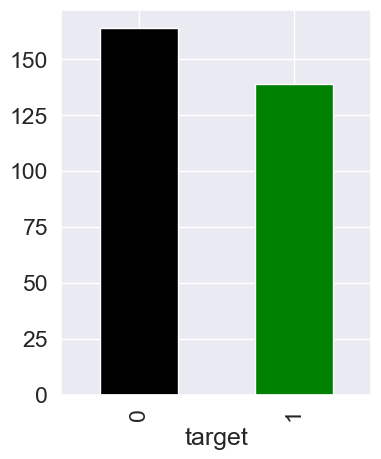

In [97]:
df["target"].value_counts().plot(kind="bar", color=["black", "green"], figsize=(4, 5));

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values? 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


### Heart Disease Frenquency according to Sex

In [12]:
df.sex.value_counts()

sex
1    206
0     97
Name: count, dtype: int64

In [13]:
#comparing target columns with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,72,92
1,25,114


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

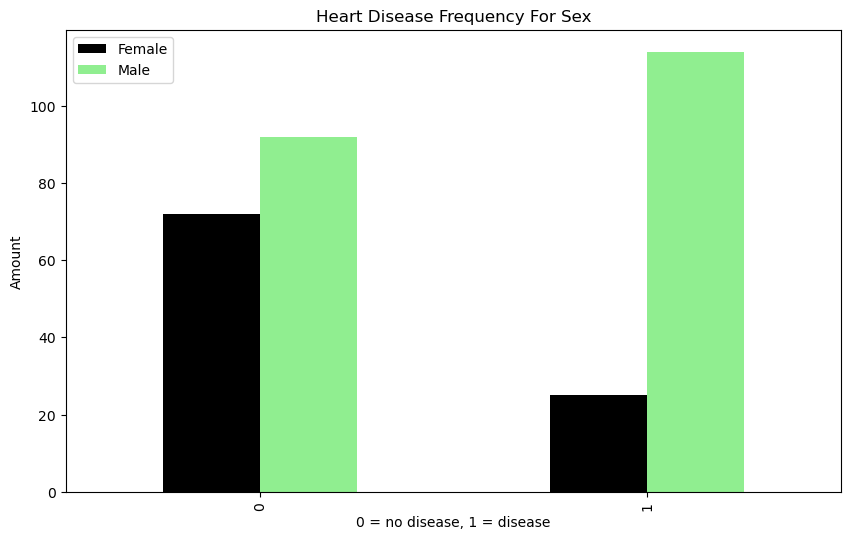

In [14]:
# Create a plot Crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6), #(width, bredth)
                                    color=["black", "lightgreen"])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks()

## Age vs. Max Rate for Heart Disease 

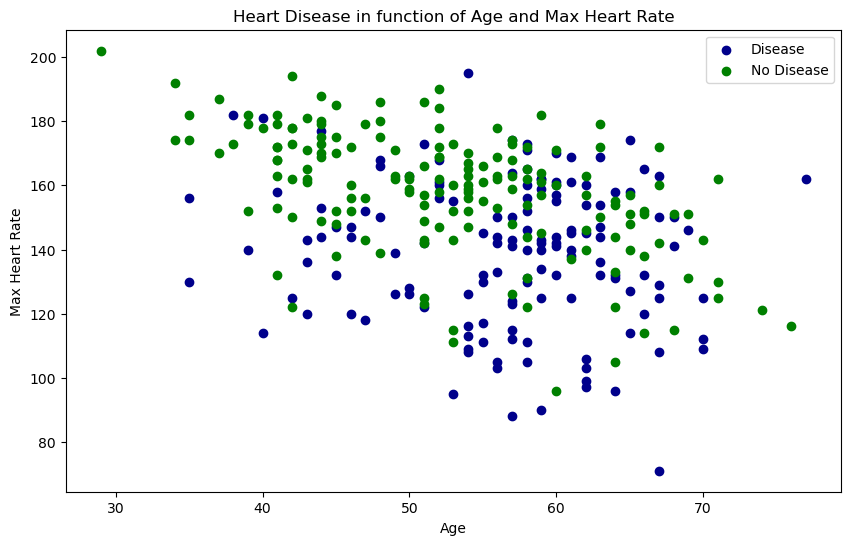

In [15]:
# create another figure
plt.figure(figsize=(10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="darkblue")
#Scattter with negitive examlples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="green")
#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

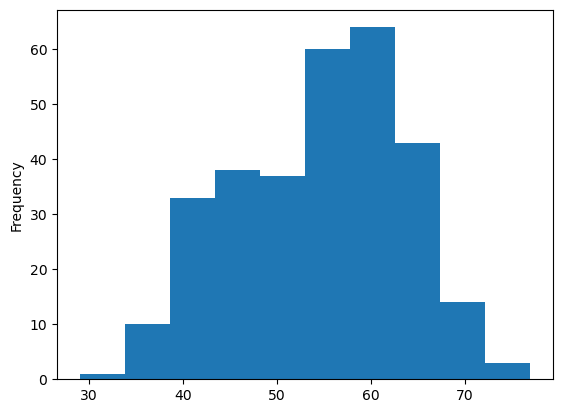

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

1. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
   * 0 typical angina,
   * 1 atypical angina,
   * 2 non- anginal pain,
   * 3 asymptomatic (Nominal)

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,16,7
1,41,9
2,68,18
3,39,105


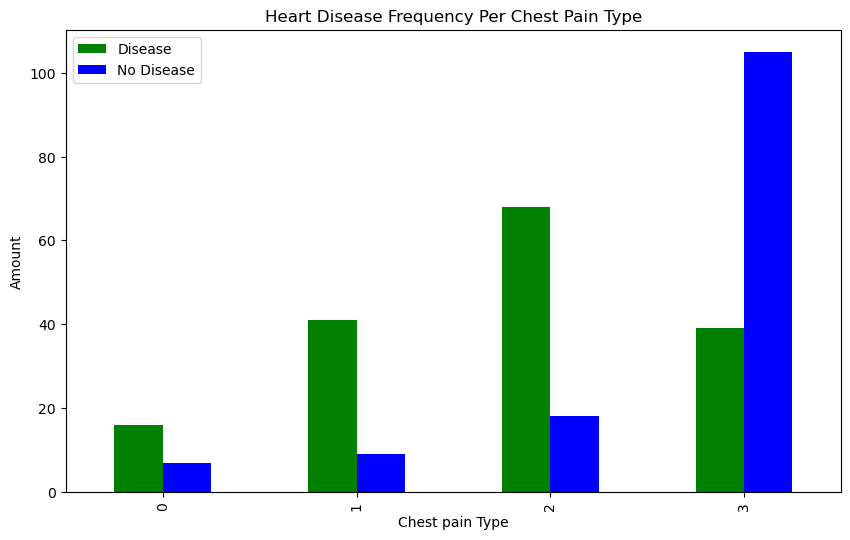

In [18]:
# Make the Crosstab more visuals

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["green", "blue"])
# add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["Disease","No Disease"])

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [20]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


(14.5, 0.5)

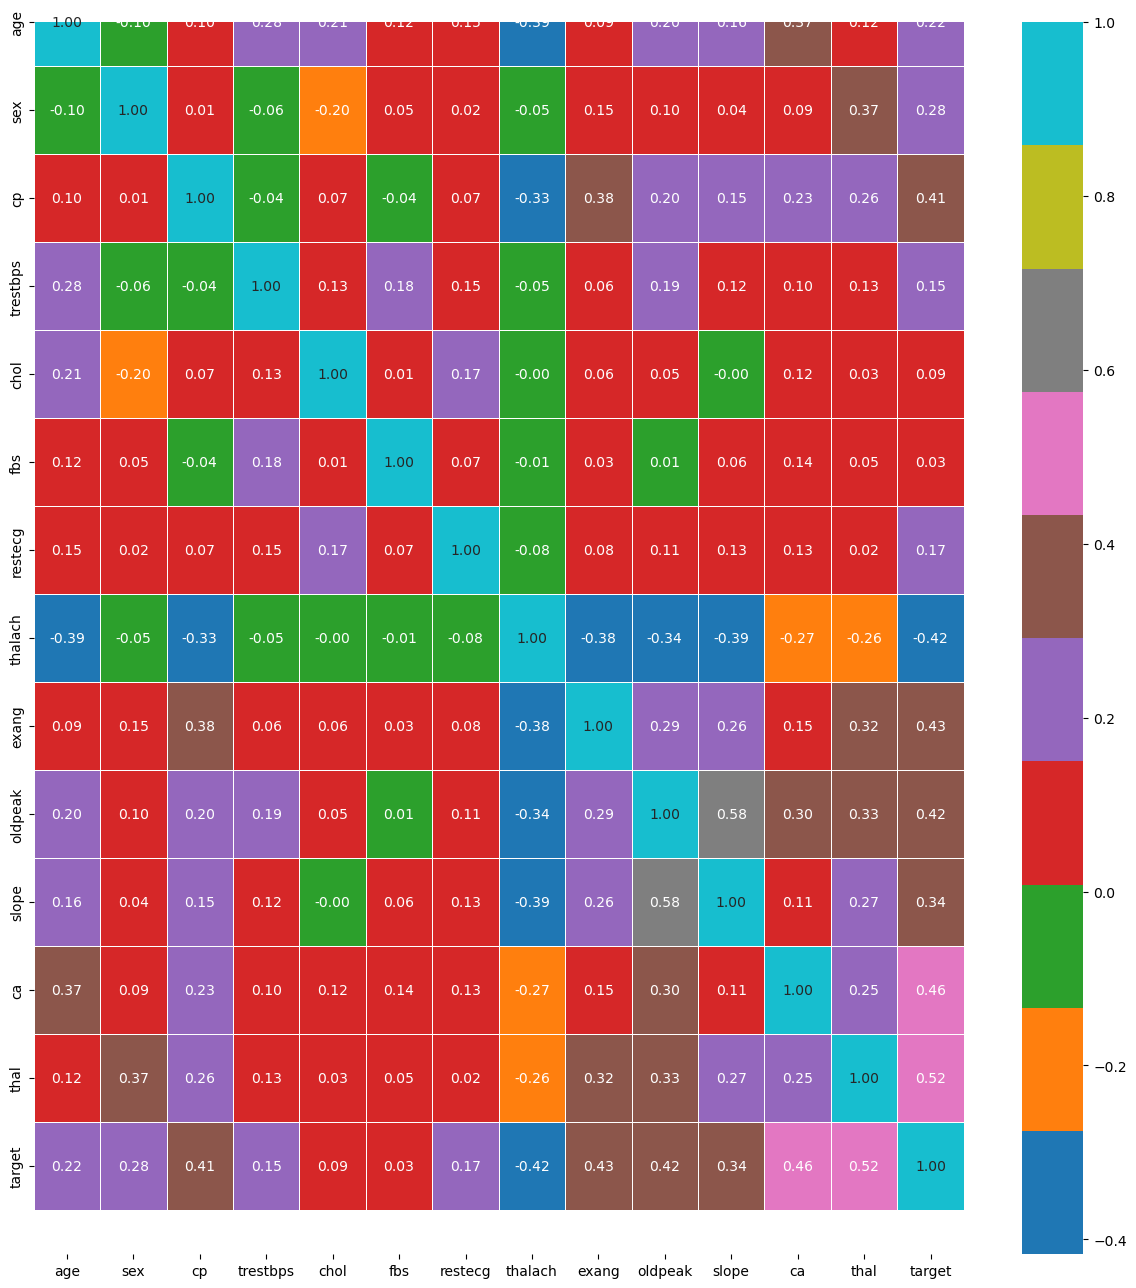

In [21]:
# let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 16))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="tab10");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top = 0.5)

## 5.Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [23]:
#split data into x and y
x = df.drop("target", axis=1)

y = df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [25]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

In [26]:
 # split data into train and test sets
np.random.seed(42)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29,1,1,130,204,0,2,202,0,0.0,0,0,1
202,57,1,2,150,126,1,0,173,0,0.2,0,1,3
196,69,1,0,160,234,1,2,131,0,0.1,1,1,1
75,65,0,2,160,360,0,2,151,0,0.8,0,0,1
176,52,1,3,108,233,1,0,147,0,0.1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,1,192,283,0,2,195,0,0.0,0,1,3
71,67,1,3,125,254,1,0,163,0,0.2,1,2,3
106,59,1,3,140,177,0,0,162,1,0.0,0,1,3
270,61,1,3,140,207,0,2,138,1,1.9,0,1,3


In [28]:
y_train, len(y_train)

(132    0
 202    0
 196    0
 75     0
 176    0
       ..
 188    1
 71     1
 106    1
 270    1
 102    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split data into training and test sets, it's time to bulid a machine learning model.

We'll train it(finding the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

we're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearesr Neighbours classifier
3. Random Forest Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training data
    y_test : testing data
    """
    #set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

### Model Compression

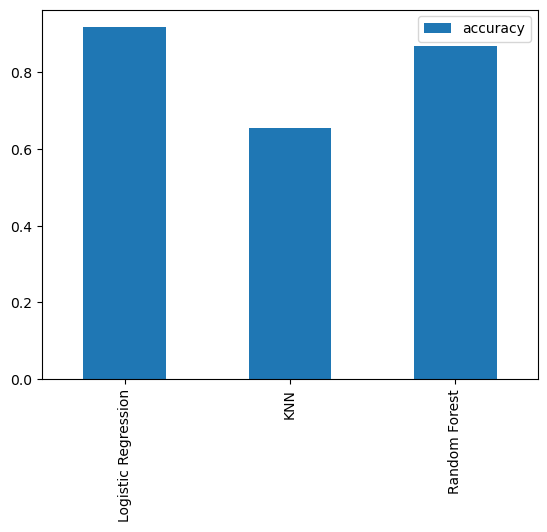

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();



Now we've got a baseline model... and we know a models's first predictions aren't always what we should based our next steps off. what should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall 
* F1 score
* Classification report
* ROC curve 
* Area under the curve(AUC)

### Hyperparameter tuning


In [33]:
#Let's tune KNN

train_scores = []
test_scores = []

# creates a list of differrent values for n neighbors
neighbors = range(1, 21)

#setup KNN instances 
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the alogrithm  
    knn.fit (x_train, y_train)

    # update the training scores list
    train_scores.append(knn.score(x_train, y_train))

    # update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [34]:
train_scores


[1.0,
 0.78099173553719,
 0.7603305785123967,
 0.7603305785123967,
 0.7479338842975206,
 0.7231404958677686,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.6818181818181818,
 0.7066115702479339,
 0.7107438016528925,
 0.6859504132231405,
 0.6900826446280992,
 0.6694214876033058,
 0.6776859504132231,
 0.6735537190082644,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579]

In [35]:
test_scores

[0.6065573770491803,
 0.5901639344262295,
 0.639344262295082,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


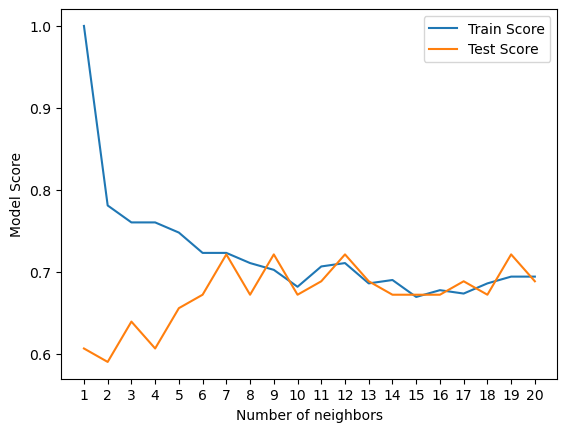

In [36]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score") 
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

 ### Hyperparameter tuning with RandomizedSearchCv

 We're going to tune:
 * LogisticRegression()
 * RandomForestClassifier()
   
.....using RandomizedSearchaCV 

In [37]:
# create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": [100, 200, 500],
          "max_depth": [None, 5, 10],
          "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 4]}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCv

In [38]:
# Tune LogisticRegression
np.random.seed(42)

#setup random hyperparameter Search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)


# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(x_test, y_test)

0.9016393442622951

Now we've  got hyperparameter grids setups for each of our models, let's tune them using RandomizedSearchCv....

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# parameter grid
rf_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# RandomizedSearchCV
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit
rs_rf.fit(x_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   verbose=True)

In [42]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': True}

In [43]:
# Evaluate the randomized search RandomforestClassifier model

rs_rf.score(x_test, y_test)

0.8688524590163934

## hyperparamater Tuning with GridSearchCV

since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [44]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

#setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [46]:
# Evaluate  the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.9016393442622951

In [47]:
model_scores

{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

## Evaluting our tuning machine learning classifier, beyond accuracy 

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible.


In [48]:
y_preds = gs_log_reg.predict(x_test)

In [49]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [50]:
y_test

179    0
228    1
111    1
246    1
60     1
      ..
249    0
104    1
300    1
193    1
184    1
Name: target, Length: 61, dtype: int64

In [51]:
from sklearn.metrics import RocCurveDisplay

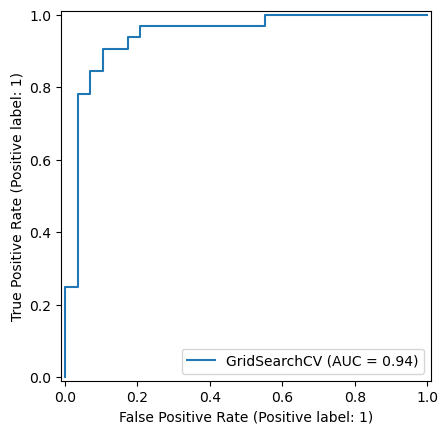

In [52]:
 # plot ROC curve and calculate and calulate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [53]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[26  3]
 [ 3 29]]


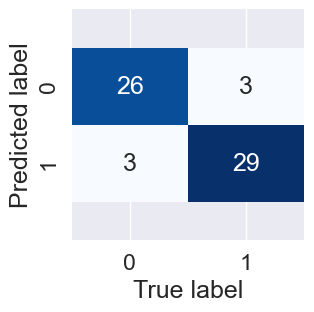

In [54]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True,
                    cmap="Blues",
                    cbar=False)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC meteric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Calculate evalution metrics using cross-validation

we're going calculate precision,recall,f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'.

In [56]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [57]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.38566204211634725,
                        solver='liblinear')

In [58]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.86885246, 0.85245902, 0.78688525, 0.81666667, 0.8       ])

In [59]:
cv_acc =  np.mean(cv_acc)
cv_acc

0.8249726775956283

In [60]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              x,
                              y,cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8384652981427175

In [61]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.7764550264550264

In [62]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8017565388606551

<Axes: title={'center': 'Cross-validated classification metrics'}>

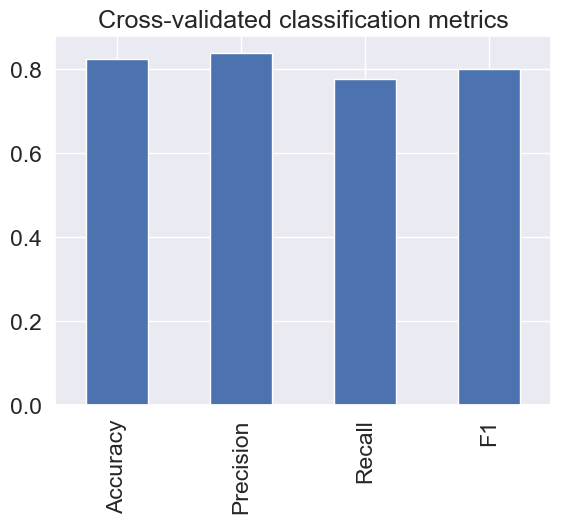

In [64]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for"(MODEL NAME) feature importance."

Let's find the feature importance for our LogisticRegression model....

In [88]:
 # fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.38566204211634725,
                       solver="liblinear")
clf.fit(x_train, y_train);

In [89]:
# check coef_
clf.coef_

array([[-0.02851564,  0.78336235,  0.35685085,  0.01016581,  0.00484734,
        -0.2625504 ,  0.1587292 , -0.03116791,  0.56624388,  0.32390085,
         0.35277236,  1.1267513 ,  0.56897314]])

In [71]:
# Match coef's of feature to columns
feature_dict = dict(zip(df, list(clf.coef_[0])))

In [72]:
feature_dict

{'age': -0.02851564382776655,
 'sex': 0.7833623511976868,
 'cp': 0.356850854105819,
 'trestbps': 0.010165813790210835,
 'chol': 0.00484734077211865,
 'fbs': -0.26255040244448313,
 'restecg': 0.15872920307119798,
 'thalach': -0.031167910360705348,
 'exang': 0.5662438771054555,
 'oldpeak': 0.32390084914519524,
 'slope': 0.3527723562126064,
 'ca': 1.126751303896728,
 'thal': 0.5689731357689287}

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [75]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

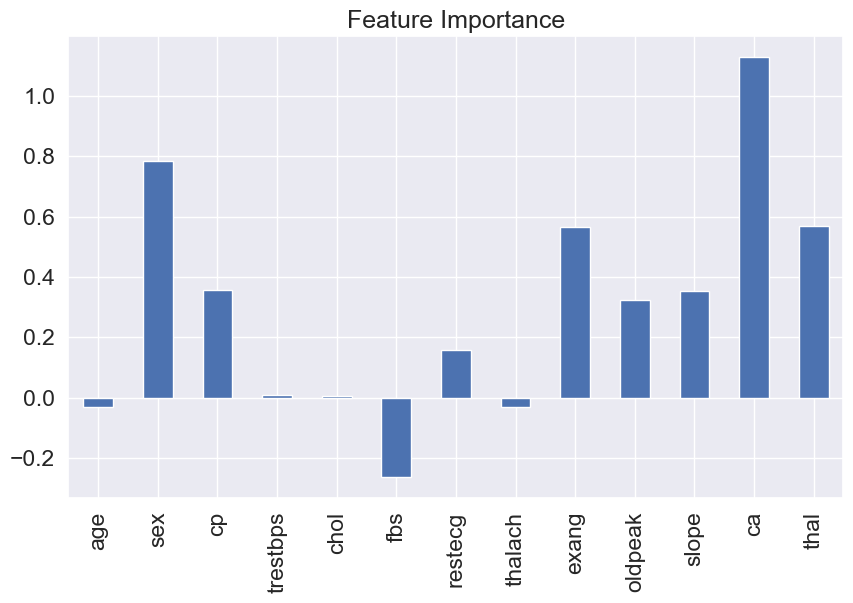

In [86]:
feature_df.T.plot.bar(title="Feature Importance", 
                      figsize=(10,6),
                      legend=False);

In [80]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,72,25
1,92,114


In [84]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,106,36
1,49,91
2,9,12


slope-ST segment measured in terms of slope during peak exercise
* 0: up sloping-uncommon; 
* 1: flat sloping-typically healthy heart;
* 2: down sloping(Nominal)-unhealthy heart.

### 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you imporve the current models?
* If your model is good enough (you have hit your evaluation metric) how would you export it share it with others?
  